In [64]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt


# 1. Defining the structure

We want to model a photonic crystal with lattice constant *a* = 0.420 microns. 
- radius = 0.3a
- wavelength range from 1.50 to 1.56 microns
- (x, y, z) dimensions = (15, 10, 0.26)
- refractive index = 3.23

For now, we ignore thickness and treat the crystal as a 2-dimensional structure. 

In [109]:
resolution = 20
a = 0.420
w = 15
h = 10
d = 0.26
r = 0.3 * a
default_material = mp.Medium(epsilon=10.4329)

wvg_height = a
wvg_width = 10*a

def get_hole_centers(w, h, a, line_defect=False):
    horizontal_spacing = a * np.sqrt(3) / 2
    padding = 0.0

    h = h - padding
    w = w - padding

    num_rows = int(h // a)
    halfway_point = num_rows // 2

    start_x = -w / 2
    end_x = w / 2

    hole_centers = []

    for row in range(0, num_rows):
        if line_defect and row == halfway_point:
            continue

        y = (row - halfway_point) * a
        x = start_x
        if row % 2 == 1:
            x += horizontal_spacing / 2
        
        while x <= end_x:
            hole_centers.append((x, y))
            x += horizontal_spacing

    return hole_centers

sx = w + wvg_width
sy = h
cell = mp.Vector3(sx,sy,0)

dpml = 1.0
pml_layers = [mp.PML(dpml, side=mp.Low, direction=mp.Y), 
              mp.PML(dpml, side=mp.High, direction=mp.Y),
              mp.PML(dpml, side=mp.High, direction=mp.X),
              mp.PML(thickness=dpml + wvg_width/2, side=mp.Low, direction=mp.X)]

hole_centers = get_hole_centers(w, h, a, line_defect=True)
holes = [mp.Cylinder(r, center=mp.Vector3(x, y), material=mp.air) 
         for x, y in hole_centers]


geometry = [mp.Block(size=mp.Vector3(w, h, mp.inf),
                     center=mp.Vector3(),
                     material=default_material),
                     mp.Block(size=mp.Vector3(wvg_width, wvg_height, mp.inf),
                              center=mp.Vector3(w/2 + wvg_width/2),
                              material=default_material),
                     *holes,
                     ]

for hole in holes[0:10]:
    print(hole.center)

Vector3<-7.5, -4.62, 0.0>
Vector3<-7.136269330410536, -4.62, 0.0>
Vector3<-6.772538660821072, -4.62, 0.0>
Vector3<-6.408807991231607, -4.62, 0.0>
Vector3<-6.045077321642143, -4.62, 0.0>
Vector3<-5.681346652052679, -4.62, 0.0>
Vector3<-5.317615982463215, -4.62, 0.0>
Vector3<-4.953885312873751, -4.62, 0.0>
Vector3<-4.590154643284286, -4.62, 0.0>
Vector3<-4.226423973694822, -4.62, 0.0>


Now we define a light source. This is a Gaussian source near the left side of the device, in the center of a group of holes. What we really want here is a quantum dot source.  

In [110]:
fcen = 0.641  # pulse center frequency
df = 0.01     # pulse width (in frequency)

source_x_center = (holes[3].center.x + holes[4].center.x) / 2

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ez,
                     center=mp.Vector3(source_x_center),
                     size=mp.Vector3(0,0,0))]

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.40881,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.04508,-4.62

cylinder, center = (-5.31762,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-4.95389,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     ...(+ 906 objects not shown)...


<Axes: xlabel='X', ylabel='Y'>

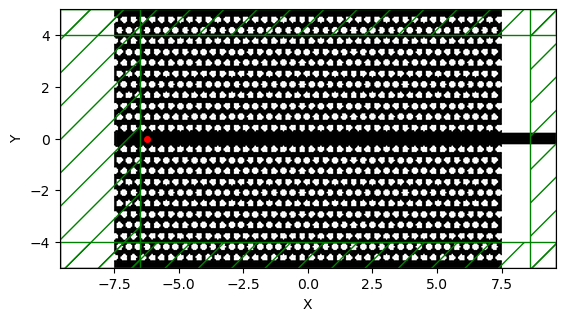

In [111]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)
sim.plot2D()

### 1b. Visualize the field

In [112]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00754714 s
Working in 2D dimensions.
Computational cell is 19.2 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.

FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 195.82500000000002/200.0 = 97.9% done in 4.0s, 0.1s to go
on time step 7840 (time=196), 0.000510211 s/step
run 0 finished at t = 200.0 (8000 timesteps)


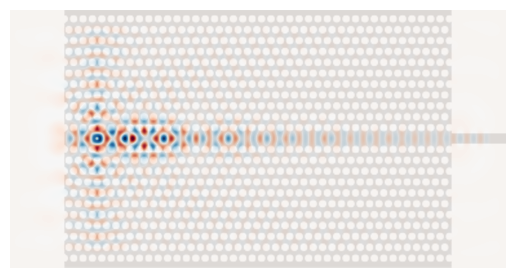

In [113]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

# 2. Get the Flux

Let's get the transmission spectrum at the right end of the waveguide, right before the edge of the cell. 

To do this, we need to determine the transmittance in the waveguide structure and normalize it by the incident power (computed by using the same point in a structure that only contains air).

First, we compute the transmittance from the structure itself. 

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     cylinder, center = (-7.5,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-7.13627,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.77254,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.40881,-4.62,0)
          radius 0.126, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-6.04508,-4.62

<Axes: xlabel='X', ylabel='Y'>

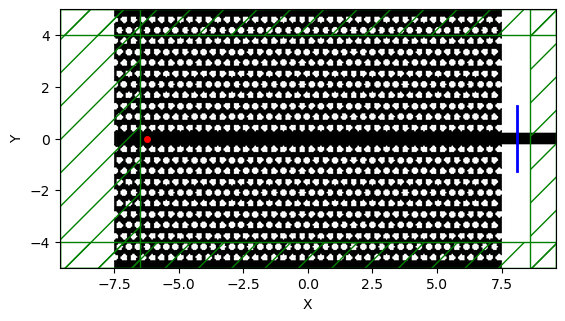

In [114]:
nfreq = 500  # number of frequencies at which to compute flux

# transmitted flux (across a 3a tall line, 0.1 micron from the right edge of the waveguide)

flux_x = w / 2  + wvg_width/2 - dpml - 0.5

tran_fr = mp.FluxRegion(center=mp.Vector3(flux_x, 0, 0), size=mp.Vector3(0, h/4,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)

sim.plot2D()

In [115]:
pt = mp.Vector3(flux_x, h/4)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,1e-3))

field decay(t = 200.0): 2.343376061305606e-10 / 2.343376061305606e-10 = 1.0
on time step 8000 (time=200), 0.0672736 s/step
field decay(t = 250.025): 2.7376975018618528e-08 / 2.7376975018618528e-08 = 1.0
field decay(t = 300.05): 4.301612776061295e-07 / 4.301612776061295e-07 = 1.0
on time step 13169 (time=329.225), 0.000774036 s/step
field decay(t = 350.07500000000005): 3.956497504862378e-06 / 3.956497504862378e-06 = 1.0
field decay(t = 400.1): 2.0489969095245867e-05 / 2.0489969095245867e-05 = 1.0
field decay(t = 450.125): 5.5724718981039104e-05 / 5.5724718981039104e-05 = 1.0
field decay(t = 500.15000000000003): 6.759988879545999e-05 / 6.759988879545999e-05 = 1.0
on time step 20311 (time=507.775), 0.000560123 s/step
field decay(t = 550.15): 6.17271434908796e-05 / 6.759988879545999e-05 = 0.91312492654611
field decay(t = 600.1750000000001): 0.000266490468039411 / 0.000266490468039411 = 1.0
field decay(t = 650.2): 0.0008679098885045433 / 0.0008679098885045433 = 1.0
on time step 27958 (time=

In [116]:
waveguide_tran_flux = mp.get_fluxes(tran)

# 3. Get flux for a reference structure (all dielectric)

For our reference transmittance, we define a cell with the same dimensions that only contains air. 

     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)


<Axes: xlabel='X', ylabel='Y'>

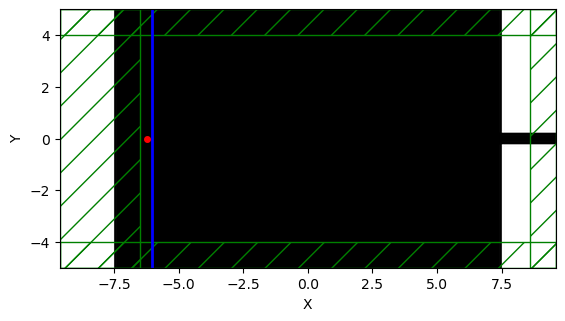

In [117]:
sim.reset_meep()
geometry = []
geometry = [mp.Block(size=mp.Vector3(w, h, mp.inf),
                     center=mp.Vector3(),
                     material=default_material),
            mp.Block(size=mp.Vector3(wvg_width, wvg_height, mp.inf),
                              center=mp.Vector3(w/2 + wvg_width/2),
                              material=default_material),
                     ]
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)




In [118]:
tran_fr = mp.FluxRegion(center=mp.Vector3(source_x_center+0.2, 0, 0), size=mp.Vector3(0,h,0))
tran = sim.add_flux(fcen, df, nfreq, tran_fr)
sim.plot2D()

pt = mp.Vector3(flux_x, h)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ez,pt,5e-3))

air_tran_flux = mp.get_fluxes(tran)

flux_freqs = mp.get_flux_freqs(tran)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000256062 s
Working in 2D dimensions.
Computational cell is 19.2 x 10 x 0 with resolution 20
     block, center = (0,0,0)
          size (15,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
     block, center = (9.6,0,0)
          size (4.2,0.42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.4329,10.4329,10.4329)
time for set_epsilon = 0.170891 s
-----------
on time step 7356 (time=183.9), 0.000543811 s/step
on time step 14766 (time=369.15), 0.000539842 s/step
on time step 22117 (time=552.925), 0.000544217 s/step
on time step 29377 (time=734.425), 0.000550997 s/step
on time step 36721 (time=918.025), 0.000544686 s/step
run 0 finished at t = 1000.5 (40020 timesteps)


### 3b. Plotting the field for the reference structure

In [131]:
sim.run(until=200)

FloatProgress(value=1850.5, description='0% done ', max=2050.5, min=1850.5)

on time step 74020 (time=1850.5), 0.002153 s/step
Meep progress: 174.82500000000005/2050.5 = 8.5% done in 4.0s, 42.9s to go
on time step 81021 (time=2025.53), 0.000571354 s/step
run 5 finished at t = 2050.5 (82020 timesteps)


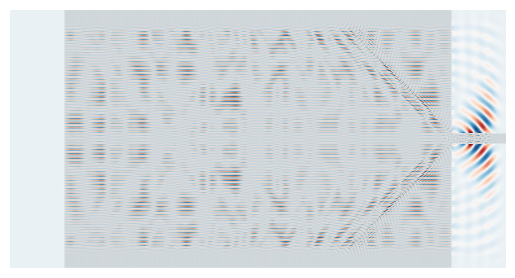

In [132]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()

# Plot the transmittance spectrum

In the following plot, transmittance is calculated by normalizing the waveguide transmittance flux by the air transmittance flux. Note that the transmittance sometimes goes above 1 because we are normalizing it by the flux in a region that likely gets less of that wavelength when there is no waveguide present. 

Is there a better reference to compare this against?

In [121]:
print(waveguide_tran_flux)

[0.06028841436966522, 0.06429834473362349, 0.06837168761112464, 0.07250195958849215, 0.07668628725709103, 0.08092617815244087, 0.08522829174969818, 0.08960519529891459, 0.09407608843520739, 0.09866747994697474, 0.10341379985957438, 0.10835793012933624, 0.11355163775980683, 0.11905589507582127, 0.1249410732239754, 0.1312869967243106, 0.1381828490567352, 0.1457269218254547, 0.1540262029767691, 0.16319580280903337, 0.17335822007392454, 0.1846424542694314, 0.19718297419716707, 0.21111855694641926, 0.22659101557229877, 0.24374383779821307, 0.2627207619810166, 0.2836643202535998, 0.3067143821020061, 0.33200673454743274, 0.3596717374951562, 0.38983309460812965, 0.4226067811401763, 0.4581001704991241, 0.49641140080021584, 0.5376290212738314, 0.5818319560794241, 0.629089819810673, 0.6794636147736308, 0.7330068349581241, 0.7897669955886454, 0.8497876002364105, 0.9131105498166929, 0.9797789894644743, 1.0498405803931299, 1.1233511745621805, 1.2003788604161163, 1.2810083383566886, 1.365345575090161

In [122]:
print(air_tran_flux)

[0.05808598101768403, 0.06286269571199145, 0.06801060086590478, 0.07355669504357225, 0.07952978956882047, 0.08596061842180026, 0.09288195391382713, 0.10032872838132605, 0.10833816214523949, 0.11694989798618499, 0.12620614239417402, 0.13615181385250053, 0.14683469842296978, 0.15830561290344997, 0.17061857582933534, 0.18383098660259867, 0.1980038130214883, 0.21320178750142973, 0.22949361226783757, 0.2469521738096543, 0.2656547668807949, 0.2856833283353475, 0.30712468108746577, 0.33007078847497373, 0.35461901931488315, 0.3808724239276208, 0.40894002140535385, 0.4389370983949417, 0.47098551965747615, 0.5052140506615913, 0.541758692456454, 0.580763029060704, 0.6223785875932542, 0.6667652113571515, 0.7140914460757122, 0.7645349394599816, 0.8182828542747467, 0.8755322950442518, 0.9364907485258229, 1.0013765380458168, 1.0704192917803224, 1.1438604250265019, 1.2219536364850756, 1.304965418544957, 1.3931755815312665, 1.4868777918237437, 1.5863801237548818, 1.6920056251120064, 1.8040928960579725,

In [123]:
print(mp.dft_ldos(fcen, df, nfreq))

<function dft_ldos.<locals>._ldos at 0x7fbba1418360>


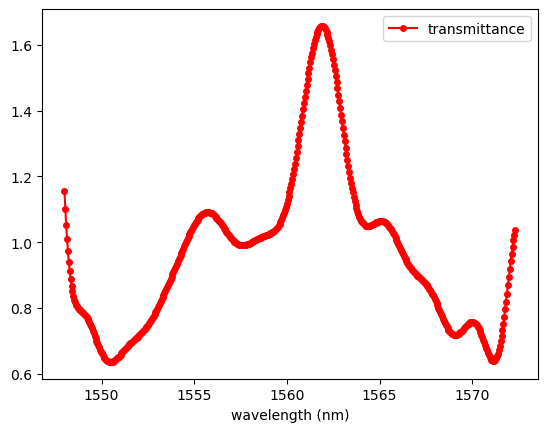

In [124]:
wl = []
Rs = []
Ts = []
for i in range(nfreq):
    wl = np.append(wl, 1000 * 1/flux_freqs[i])
    Ts = np.append(Ts,waveguide_tran_flux[i]/air_tran_flux[i])

if mp.am_master():
    plt.figure()
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize=4)
    # plt.axis([1500, N, 0, 1])
    plt.xlabel("wavelength (nm)")
    plt.legend(loc="upper right")
    plt.show()